In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [7]:
stations = np.array(['FPZ_06A', 'FSB_079', 'FSB_095DR', 'FSB_078', 'FSB_130D',
       'FEX_004', 'FSB_126', 'FPZ_04A', 'FSB_097D', 'FAI_012', 'FAI_009'])

In [53]:
index = 1
df = pd.read_csv(f"../data/merged_data_stationwise/{stations[index]}.csv")
df.head()

,Date Time,station_id,Battery Level (%),Baro (psi),pH (pH),pH MV (mV),ORP (mV),DO (mg/L),% Saturation O₂ (% sat),Partial Pressure O₂ (psi),...,Temperature,Actual Conductivity,Specific Conductivity,Total Dissolved Solids,Pressure,DepthtoWater,Salinity,Resistivity,Density,Depth
0,2022-11-07 18:42:00,FSB_079,95.783821,14.729117,7.201291,-20.630360,292.286865,6.131140,66.175232,1.876592,...,19.100147,450.751801,458.634430,298.112392,-4.974093,26.821591,0.247483,2218.515869,0.998577,-3.305810
1,2022-11-07 19:00:00,FSB_079,95.730453,14.724907,7.174758,-19.042492,294.616211,6.088908,65.525650,1.858076,...,18.939169,449.845428,459.148651,298.446625,-4.968347,26.817549,0.247839,2222.985840,0.998609,-3.301704
2,2022-11-07 20:00:00,FSB_079,95.720161,14.720706,7.104020,-14.827251,306.332123,6.256437,67.022903,1.900467,...,18.699713,449.328613,460.772095,299.501866,-4.966508,26.816256,0.248846,2225.542725,0.998657,-3.300523
3,2022-11-07 21:00:00,FSB_079,95.711166,14.719163,7.109406,-15.144348,310.559265,6.481783,69.371567,1.966818,...,18.647724,450.204529,462.140930,300.391614,-4.964888,26.815117,0.249631,2221.212646,0.998667,-3.299341
4,2022-11-07 22:00:00,FSB_079,95.699585,14.718247,7.133124,-16.551018,311.930176,6.580073,70.399254,1.995809,...,18.627506,450.604279,462.734680,300.777555,-4.963372,26.814052,0.249970,2219.242188,0.998671,-3.298273


In [55]:
df['na_data'] = df.isna().sum(axis = 1)
df.head()

,Date Time,station_id,Battery Level (%),Baro (psi),pH (pH),pH MV (mV),ORP (mV),DO (mg/L),% Saturation O₂ (% sat),Partial Pressure O₂ (psi),...,Actual Conductivity,Specific Conductivity,Total Dissolved Solids,Pressure,DepthtoWater,Salinity,Resistivity,Density,Depth,na_data
0,2022-11-07 18:42:00,FSB_079,95.783821,14.729117,7.201291,-20.630360,292.286865,6.131140,66.175232,1.876592,...,450.751801,458.634430,298.112392,-4.974093,26.821591,0.247483,2218.515869,0.998577,-3.305810,0
1,2022-11-07 19:00:00,FSB_079,95.730453,14.724907,7.174758,-19.042492,294.616211,6.088908,65.525650,1.858076,...,449.845428,459.148651,298.446625,-4.968347,26.817549,0.247839,2222.985840,0.998609,-3.301704,0
2,2022-11-07 20:00:00,FSB_079,95.720161,14.720706,7.104020,-14.827251,306.332123,6.256437,67.022903,1.900467,...,449.328613,460.772095,299.501866,-4.966508,26.816256,0.248846,2225.542725,0.998657,-3.300523,0
3,2022-11-07 21:00:00,FSB_079,95.711166,14.719163,7.109406,-15.144348,310.559265,6.481783,69.371567,1.966818,...,450.204529,462.140930,300.391614,-4.964888,26.815117,0.249631,2221.212646,0.998667,-3.299341,0
4,2022-11-07 22:00:00,FSB_079,95.699585,14.718247,7.133124,-16.551018,311.930176,6.580073,70.399254,1.995809,...,450.604279,462.734680,300.777555,-4.963372,26.814052,0.249970,2219.242188,0.998671,-3.298273,0


In [57]:
df.shape

(8957, 22)

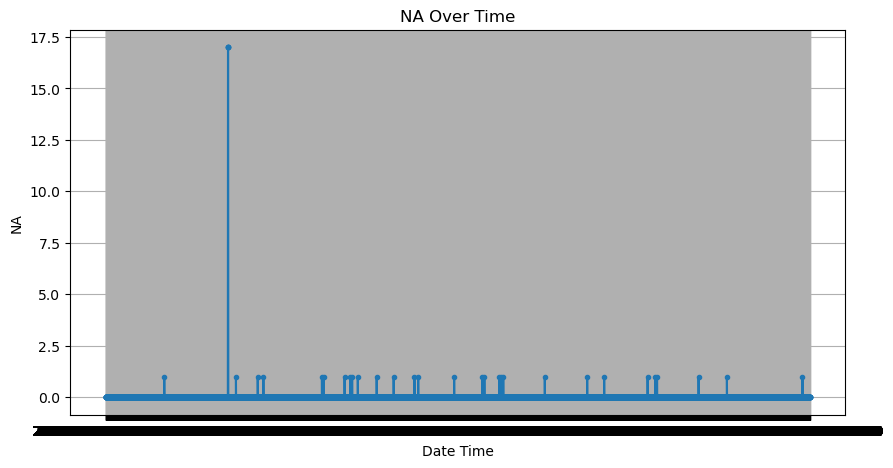

In [59]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date Time'],df['na_data'], marker='.')
plt.title('NA Over Time')
plt.xlabel('Date Time')
plt.ylabel('NA')
plt.grid(True)
plt.show()